In [1]:
### Benjamin Tollison ###
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def PlotSturcture(N,C,color:str):
    m,_ = C.shape
    for i in range(m):
        ii = np.nonzero(C[i])
        plt.plot(N[0,ii][0],N[1,ii][0],color)
        plt.axis('equal')
def DistanceChecker(x1,y1,x2,y2):
  dx,dy = delta, delta
  distance_between_x = abs(x1 - x2)
  distance_between_y = abs(y1 - y2)
  if distance_between_x < dx*2**0.5 + dx/5 and distance_between_y < dy*2**0.5 + dy/5:
     return True
  else:
     return False
def is_repeat_pattern(patterns, new_pattern):
    new_tuple = tuple(new_pattern)
    seen_tuples = set(map(tuple, patterns))
    if new_tuple in seen_tuples:
        return True
    else:
        return False
def BuildConnectivityMatrix(number_of_members,number_of_nodes,cooridnate_matrix):
  C = np.zeros((number_of_members,number_of_nodes))
  C_duplicate = []
  member = 0
  for node in range(number_of_nodes-1):
    for other_node in range(1,number_of_nodes):
      predetermined_indices = [node,other_node]  # Indices where you want to put 1s
      duplicate_check_tuple= tuple(1 if i in predetermined_indices else 0 for i in range(number_of_nodes))
      if is_repeat_pattern(C_duplicate,duplicate_check_tuple):
          duplicate_check_bool = False
      else:
          duplicate_check_bool = True
          C_duplicate.append(duplicate_check_tuple)
      node_x1,node_y1 = cooridnate_matrix[0][node], cooridnate_matrix[1][node]
      node_x2,node_y2 = cooridnate_matrix[0][other_node], cooridnate_matrix[1][other_node]
      if other_node != node and DistanceChecker(node_x1,node_y1,node_x2,node_y2) and duplicate_check_bool and member < number_of_members:
        C[member][node], C[member][other_node] = 1, -1
        member += 1
  print("Built C matrix ;)")
  return C
length = 4
height = 1
delta = 1/9
x_step_number = int(length/delta)
y_step_number = int(height/delta)
number_of_nodes = x_step_number*y_step_number
x_coords = np.linspace(0, length, x_step_number)
y_coords = np.linspace(0, height, y_step_number)
X, Y = np.meshgrid(x_coords, y_coords)
N = np.vstack((X.ravel(), Y.ravel()))
number_of_members = int(6 + 5*(np.sqrt(number_of_nodes)-2) + (np.sqrt(number_of_nodes)-2)*(5+4*(np.sqrt(number_of_nodes)-2)))
plt.scatter(N[0],N[1])
axis = plt.gca()
axis.set_aspect('equal',adjustable='box')
C_B = BuildConnectivityMatrix(number_of_members,number_of_nodes,N)
C_S = C_B
PlotSturcture(N,C_B,'k')
plt.title('Bar Mesh')
plt.show()
plt.scatter(N[0],N[1])
axis = plt.gca()
axis.set_aspect('equal',adjustable='box')
PlotSturcture(N,C_S,'r')
plt.title('Cable Mesh')
plt.show()

In [ ]:
R = cp.Variable((2,number_of_nodes))
sigma_B = cp.Variable(number_of_members)
sigma_S = cp.Variable(number_of_members)
free_nodes = [i for i in np.where(N[0] != 0.0)]
F_ext = np.zeros((2, number_of_nodes))
far_right_nodes = [i for i in map(list,np.where(N[0] == length))]
node_where_F_is_applied = np.argmin(np.abs(N[1][far_right_nodes] - height/2))
P = -1
F_ext[1][far_right_nodes[0][node_where_F_is_applied]] = P
Constraints = [N @ C_S.T @ cp.diag(sigma_S) @ C_S - N @ C_B.T @ cp.diag(sigma_B) @ C_B - F_ext - R == 0,
              R[:,free_nodes[0]] == 0,
              sigma_B >= 0,
              sigma_S >= 0]
Cost = cp.norm(sigma_B,2) + cp.norm(sigma_S,2)
prob = cp.Problem(cp.Minimize(Cost), Constraints)
prob.solve(solver=cp.ECOS)
pd.DataFrame(sigma_B.value).to_csv('sigma_bar.csv')
pd.DataFrame(sigma_S.value).to_csv('sigma_cable.csv')
pd.DataFrame((R.value).T).to_csv('reaction.csv')
sigma_bar_member_indices = np.where(sigma_B.value >= 1*10**-3)[0]
sigma_cable_member_indices = np.where(sigma_S.value >= 1*10**-3)[0]
C_B_final = np.zeros((number_of_members,number_of_nodes))
C_S_final = C_B_final
C_B_final = C_B[sigma_bar_member_indices]
C_S_final = C_S[sigma_cable_member_indices]
PlotSturcture(N,C_B_final,'k')
PlotSturcture(N,C_S_final,'r')

(43,)
(43,)


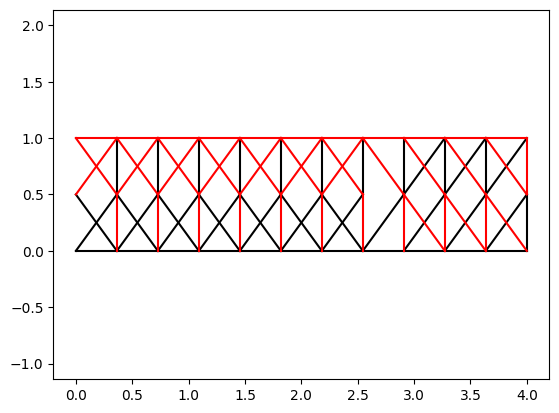

In [ ]:
Constraints = [N @ C_S.T @ cp.diag(sigma_S) @ C_S - N @ C_B.T @ cp.diag(sigma_B) @ C_B - F_ext - R == 0,
              R[:,free_nodes[0]] == 0,
              sigma_B >= 0,
              sigma_S >= 0]
Cost = cp.norm(sigma_B,1) + cp.norm(sigma_S,1)
prob = cp.Problem(cp.Minimize(Cost), Constraints)
prob.solve(solver=cp.ECOS)
pd.DataFrame(sigma_B.value).to_csv('sigma_bar.csv')
pd.DataFrame(sigma_S.value).to_csv('sigma_cable.csv')
pd.DataFrame((R.value).T).to_csv('reaction.csv')
sigma_bar_member_indices = np.where(sigma_B.value >= 1*10**-3)[0]
sigma_cable_member_indices = np.where(sigma_S.value >= 1*10**-3)[0]
C_B_final = np.zeros((number_of_members,number_of_nodes))
C_S_final = C_B_final
C_B_final = C_B[sigma_bar_member_indices]
C_S_final = C_S[sigma_cable_member_indices]
PlotSturcture(N,C_B_final,'k')
PlotSturcture(N,C_S_final,'r')